# CTA200 - Assignment 2

### Patricia Golaszewska

In [26]:
# Imported packages I suspected I'd need. I typically use these in any notebook.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import math

%matplotlib inline
plt.style.use('dark_background')
from scipy.integrate import ode

### Question 1

In this problem, we're looking at the two numerical approximations for the derivative of a function around some point $x_{0}$.

The two methods are commonly known as the forward difference and centered difference. 

The forward difference:

$$ d_x f|_{x_0} \approx \frac{f_{x_0 + h} - f_{x_0}}{h} $$

The centered difference:

$$ d_x f|_{x_0} \approx \frac{f_{x_0 + h} - f_{x_0 - h}}{2h} $$


First, we'll evaluate the derivative for a variety of h values using this method.

## For $h$ = $0.01$

In [27]:
h = 0.01

# Creating the python function for the forward difference:
def forward(f, x0, h):
    return ((f(x0 + h) - f(x0))/h)


# Creating the python function for the centered difference:
def centered(f, x0, h):
    return ((f(x0 + h) - f(x0 - h))/(2*h))


print(forward(np.sin, 0.1, h))
print(centered(np.sin, 0.1, h))

0.9944884190346656
0.9949875819581878


## For $h$ = $0.1$

In [28]:
h = 0.1

# Creating the python function for the forward difference:
def forward(f, x0, h):
    return ((f(x0 + h) - f(x0))/h)


# Creating the python function for the centered difference:
def centered(f, x0, h):
    return ((f(x0 + h) - f(x0 - h))/(2*h))


print(forward(np.sin, 0.1, h))
print(centered(np.sin, 0.1, h))

0.9883591414823306
0.9933466539753061


## For $h$ = $0.001$

In [29]:

# Creating the python function for the forward difference:
def forward(f, x0, h):
    return ((f(x0 + h) - f(x0))/h)


# Creating the python function for the centered difference:
def centered(f, x0, h):
    return ((f(x0 + h) - f(x0 - h))/(2*h))


print(forward(np.sin, 0.1, h))
print(centered(np.sin, 0.1, h))

0.9883591414823306
0.9933466539753061


Analytical methods tell us that the derivative of $sin(x)$ is $cos(x)$.

I will not admit that I needed to double check that fact, but I also will not deny it.

We will now compare the error between the numerical methods versus the analytical methods.

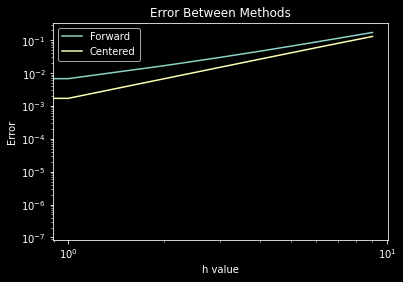

In [38]:
# First, defining the analytical function:


def analytic(x):
    return np.cos(x)


# Here, I need an alternative to what was done above. I need to create an array
# of values for the centered and forward methods

h = np.arange(0.001, 1, 0.1)
f = np.sin

x0 = 0.1
#sol_forward =  [doubler(x) for x in ints]
#sol_centered = [forward(f, x_axis_values[i], h) for x in x_axis_values]

sol_forward  = forward(f, x0, h)
sol_centered = centered(f, x0, h)
 

    
error1 = abs((forward(f, x0, h) - analytic(x0))/analytic(x0))
error2 = abs((centered(f, x0, h) - analytic(x0))/analytic(x0))

plt.loglog(error1, label = 'Forward')
plt.loglog(error2, label = 'Centered')
plt.xlabel('h value')
plt.ylabel('Error')
plt.title('Error Between Methods')
plt.legend()
plt.savefig("Q1.pdf")
plt.show()

### Question 2

In this problem, we consider points in the complex plane: $c$ = $x + iy$

Here, we will consider the following boundaries/ intial conditions:
    
$-2 < x < 2$
    
$-2 < y < 2$
    
$z_{0}$ = $0$

Here, we consider the Mandelbrot set:

$z_{n+1}$ = $z^{2}_{n} + c$


<ipython-input-40-11321a9bdf9a>:15: RuntimeWarning: overflow encountered in square
  z = z**2 + c
<ipython-input-40-11321a9bdf9a>:15: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


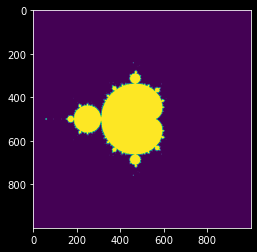

In [40]:
# Define a range of values
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)

# Create a mesh grid
x, y = np.meshgrid(x, y)

# Define the complex variable and the initial condition
c = x + 1j*y
z = 0

# Set up a counter
i = 0
while i < 100:
    z = z**2 + c
    i+= 1
    
    
# Plot
z_filter = np.abs(z) < np.inf
plt.imshow(z_filter)
plt.savefig("Q2.pdf")
plt.show()



### Question 3


In this problem, we are working with the SIR model; a simple mathematical model of disease spread in population.

The model provides us with three ordinary differential equations:

$\frac{dS}{dt}$ = $- \frac{\beta SI}{N}$

$\frac{dI}{dt}$ = $\frac{\beta SI}{N} - \gamma I$

$\frac{dR}{dt}$ = $\gamma I$

Where $S(t)$ is the number of people susceptible but not yet infected, $I(t)$ is the number of people infected, and $R(t)$ is the number of people who have recovered and now have immunity.

In my code, the parameter '$g$' represents $\gamma$ and '$B$' represents $\beta$.

In the context of the problem, $\beta$ is the transmission rate per contact, and $\gamma$ is the recovery rate of those infected. In order to observe a long-term result, we need to make both of these rates sufficiently small.


### For $\beta$ = $0.5$ and $\gamma$ = $0.2$

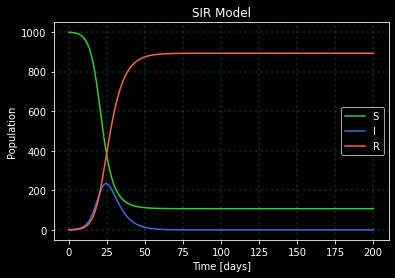

In [32]:
# Write out the system of equations

def SIR(t, W, N, g, B):
    S, I, R = W
    f = [-1*(B*S*I)/N, (B*S*I)/N - g*I, g*I]
    return f

# Choose solver
solver = ode(SIR)
solver.set_integrator('dopri5')

# Define parameters 
N = 1000
g = 0.2
B = 0.5
solver.set_f_params(N, g, B)

# Set the initial conditions
t0 = 0.0
W0 = [999, 1, 0]
# These intial conditions were provided in the assignment
solver.set_initial_value(W0, t0)

t1 = 200
n = 10000

# Create an empty array to store the solution
t = np.linspace(t0, t1, n)
sol = np.empty((n, 3))
sol[0] = W0

i = 1
while solver.successful() and solver.t < t1:
    solver.integrate(t[i])
    sol[i] = solver.y
    i += 1

# Plotting the solution:

plt.plot(t, sol[:,0], label='S', color = 'limegreen')
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.plot(t, sol[:,1], label='I', color = 'royalblue')
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.plot(t, sol[:,2], label='R', color = 'tomato')
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.title('SIR Model')
plt.legend()
plt.savefig("Q3.1.pdf")
plt.show()


### For $\beta$ = $0.8$ and $\gamma$ = $0.09$

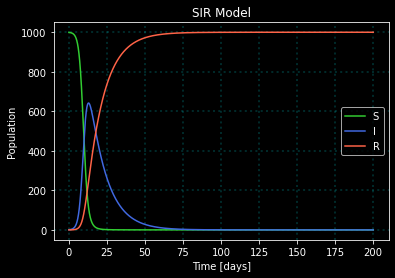

In [33]:
# Write out the system of equations

def SIR(t, W, N, g, B):
    S, I, R = W
    f = [-1*(B*S*I)/N, (B*S*I)/N - g*I, g*I]
    return f

# Choose solver
solver = ode(SIR)
solver.set_integrator('dopri5')

# Define parameters 
N = 1000
g = 0.09
B = 0.8
solver.set_f_params(N, g, B)

# Set the initial conditions
t0 = 0.0
W0 = [999, 1, 0]
# These intial conditions were provided in the assignment
solver.set_initial_value(W0, t0)

t1 = 200
n = 10000

# Create an empty array to store the solution
t = np.linspace(t0, t1, n)
sol = np.empty((n, 3))
sol[0] = W0

i = 1
while solver.successful() and solver.t < t1:
    solver.integrate(t[i])
    sol[i] = solver.y
    i += 1

# Plotting the solution:

plt.plot(t, sol[:,0], label='S', color = 'limegreen')
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.plot(t, sol[:,1], label='I', color = 'royalblue')
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.plot(t, sol[:,2], label='R', color = 'tomato')
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.title('SIR Model')
plt.legend()
plt.savefig("Q3.2.pdf")
plt.show()

### For $\beta$ = $0.7$ and $\gamma$ = $0.1$

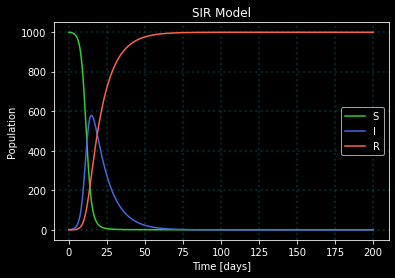

In [34]:
# Write out the system of equations

def SIR(t, W, N, g, B):
    S, I, R = W
    f = [-1*(B*S*I)/N, (B*S*I)/N - g*I, g*I]
    return f

# Choose solver
solver = ode(SIR)
solver.set_integrator('dopri5')

# Define parameters 
N = 1000
g = 0.1
B = 0.7
solver.set_f_params(N, g, B)

# Set the initial conditions
t0 = 0.0
W0 = [999, 1, 0]
# These intial conditions were provided in the assignment
solver.set_initial_value(W0, t0)

t1 = 200
n = 10000

# Create an empty array to store the solution
t = np.linspace(t0, t1, n)
sol = np.empty((n, 3))
sol[0] = W0

i = 1
while solver.successful() and solver.t < t1:
    solver.integrate(t[i])
    sol[i] = solver.y
    i += 1

# Plotting the solution:

plt.plot(t, sol[:,0], label='S', color = 'limegreen')
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.plot(t, sol[:,1], label='I', color = 'royalblue')
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.plot(t, sol[:,2], label='R', color = 'tomato')
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.title('SIR Model')
plt.legend()
plt.savefig("Q3.3.pdf")
plt.show()

The model can be adapted to include the parameter D, which represents the number of deaths in the population.

Then, our model becomes:

$\frac{dS}{dt}$ = $- \frac{\beta SI}{N}$

$\frac{dI}{dt}$ = $\frac{\beta SI}{N} - \gamma I - \mu I$

$\frac{dR}{dt}$ = $\gamma I$

$\frac{dD}{dt}$ = $\mu I$


Here, the infected population is now subjected to the mortality rate, and the rate of death is then dictated by how many infected individuals perish as a result of infection. The parameter $\mu$ is thus the mortality rate. It must be made sufficiently small as not all individuals who become infected succumb to the disease/virus. 

In my code, the parameter '$m$' represents $\mu$.

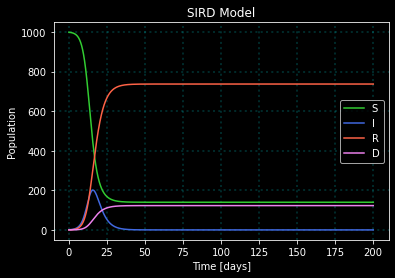

In [35]:
# Write out the system of equations

def SIR(t, W, N, g, B, m):
    S, I, R, D = W
    f = [-1*(B*S*I)/N, (B*S*I)/N - g*I - m*I, g*I, m*I]
    return f

# Choose solver
solver = ode(SIR)
solver.set_integrator('dopri5')

# Define parameters 
N = 1000
g = 0.3
B = 0.8
m = 0.05
solver.set_f_params(N, g, B, m)

# Set the initial conditions
t0 = 0.0
W0 = [999, 1, 0, 0]
# These intial conditions were provided in the assignment. I added 
# D0 = 0 because in the beginning, no one would have died yet
solver.set_initial_value(W0, t0)

t1 = 200
n = 10000

# Create an empty array to store the solution
t = np.linspace(t0, t1, n)
sol = np.empty((n, 4))
sol[0] = W0

i = 1
while solver.successful() and solver.t < t1:
    solver.integrate(t[i])
    sol[i] = solver.y
    i += 1

# Plotting the solution:

plt.plot(t, sol[:,0], label='S', color = 'limegreen')
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.plot(t, sol[:,1], label='I', color = 'royalblue')
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.plot(t, sol[:,2], label='R', color = 'tomato')
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.plot(t, sol[:,3], label='D', color = 'violet')
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.title('SIRD Model')
plt.legend()
plt.savefig("Q3.4.pdf")
plt.show()

In contrast to its SIR counterpart, the population in this model can never return to its origin state, as death is permitted in this model. Thus, although the recovery timescale is similar, the population can not be fully restored.